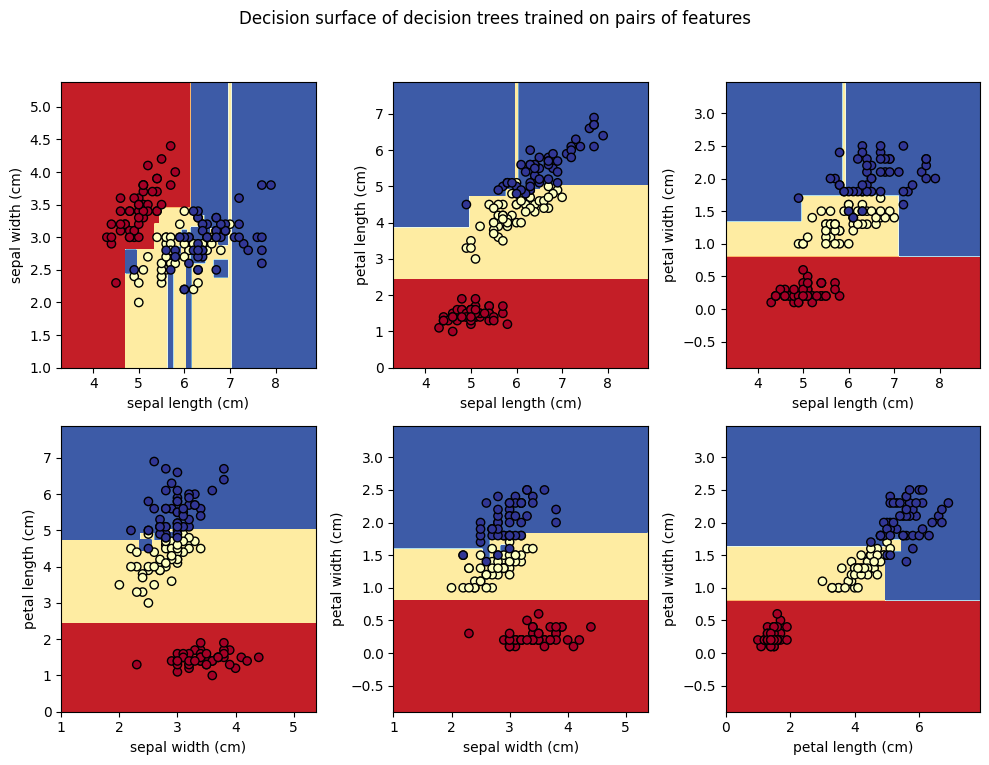

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Set up plot parameters
plot_colors = "ryb"
plot_step = 0.02
pairs = list(combinations(range(X.shape[1]), 2))  # List of all pairs of features

# Create a figure for the subplots
plt.figure(figsize=(10, 8))

# Iterate over all pairs of features
for i, (pair_1, pair_2) in enumerate(pairs):
    X_pair = X[:, [pair_1, pair_2]]  # Select the pair of features
    clf = DecisionTreeClassifier()  # Instantiate a new classifier
    clf.fit(X_pair, y)  # Train on the selected feature pair

    # Determine the plot limits
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    # Predict using the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape the predictions to match the meshgrid shape

    # Plot the decision surface
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair_1])  # X-axis label
    plt.ylabel(iris.feature_names[pair_2])  # Y-axis label

# Set the title and adjust layout
plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the spacing for the main title
plt.show()


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


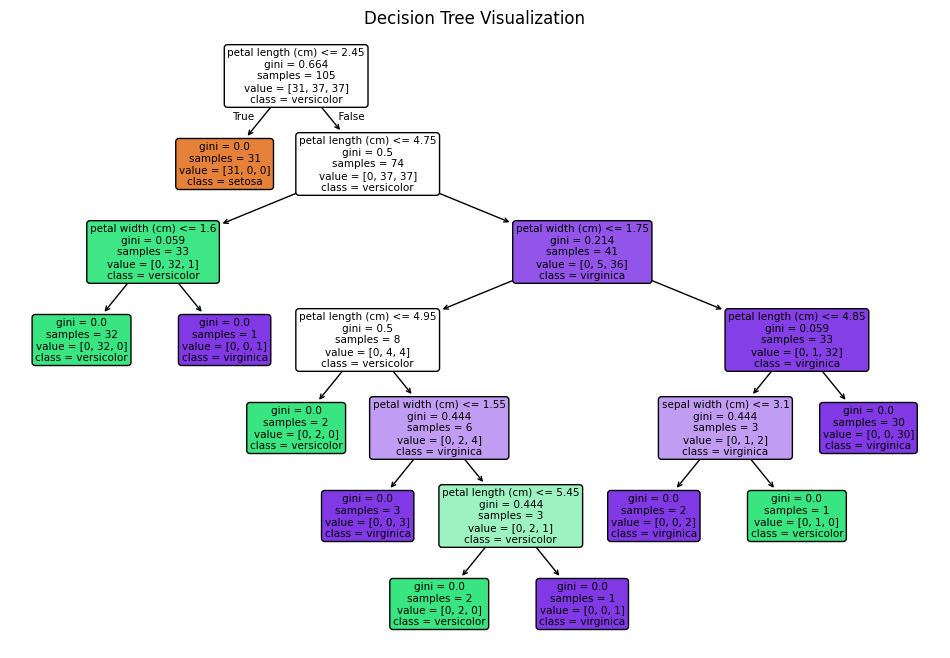

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(x_train, y_train)
y_pred = decision_tree_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
